# Creating linear LUT and merging microscopy images in Python
 The following notebook shows how to create publication quality figures in a programmtic way

In [26]:
import tifffile
import matplotlib.pylab as plt
import numpy as np
import matplotlib
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


print('tifffile version',tifffile.__version__)
print('matplotlib version',matplotlib.__version__)
print('numpy version',np.__version__)
print('plt version',plt.__version__)

def norm_gray(grayscale,imax):
    """Normalises uint8 image to value. """
    assert grayscale.dtype == np.uint8, "Your Image is not of type np.uint8"
    grayscale = (grayscale.astype(np.float64)/float(imax))*255.
    num_of_sat = np.sum(grayscale>255)
    #if num_of_sat > 0:
    print(num_of_sat,'number of saturated pixels.')
    grayscale[grayscale>255] = 255
    return grayscale.astype(np.uint8)


def apply_LUT(grayscale,lut):
    """Apply LUT to 2-D numpy array. Returns RGB 3-D numpy array. """ 
    assert grayscale.dtype == np.uint8, "Your Image is not of type np.uint8"
    rgb = lut[grayscale.reshape(-1)].reshape(grayscale.shape[0],grayscale.shape[1],3)   
    
    return (rgb*255).astype(np.uint8)

def create_LUT(rgb):
    """Will create rgb LUT. """
    r = rgb[0]/256.
    g = rgb[1]/256.
    b = rgb[2]/256.
    
    return np.array([np.linspace(0,r,256),np.linspace(0,g,256),np.linspace(0,b,256)]).T
def merge_imgs(imgs):

    assert imgs.__len__() >1, "imgs shoud be an array with at least two images"
    merged = 0
    for img in imgs:
        merged += img.astype(np.float64)
    
       
    merged[merged>255] = 255
    return merged.astype(np.uint8)
def add_scale_bar(img, origin, swidth, sheight):
    orix = int(origin[0])
    oriy = int(origin[1])
    swidth = int(np.round(swidth,0))
    sheight = int(np.round(sheight,0))
    img[oriy-sheight:oriy,orix:orix+swidth,:] = 255
    return img
    

tifffile version 2021.4.8
matplotlib version 3.4.3
numpy version 1.19.5
plt version 1.19.5


### Processing of images

In [62]:
img = tifffile.imread('images/neuron.tif') #make sure image is in uint8. 
#This is for the scale bar. I read it from the metadata.
scale_of_pixel = 9.5974 #pixels / um
scale = 10 #um how big I want my scale to be.
swidth = scale_of_pixel*scale #final scale in pixels
orix = img.shape[1]-20-swidth #Where to place my scale on the image x
oriy = img.shape[0]-20 #Where to place my scale on the image y


#Create linear look-up tables, using a particular RGB value.
cmap_c_dat = create_LUT((0,255,255)) #RGB 0-225. This one will encode cyan
cmap_r_dat = create_LUT((255,0,0)) #RGB 0-225. This one will encode red
cmap_y_dat = create_LUT((255,222,75)) #RGB 0-225. This one will encode yellow
cmap_g_dat = create_LUT((255,255,255)) #RGB 0-225. This one will encode grayscale

lut_c = ListedColormap(cmap_c_dat) #Makes an official LUT for the colormap
lut_r = ListedColormap(cmap_r_dat) #Makes an official LUT for the colormap
lut_y = ListedColormap(cmap_y_dat) #Makes an official LUT for the colormap
lut_g = ListedColormap(cmap_g_dat) #Makes an official LUT for the colormap


#Normalise images to defined value (0-255).
cmax = 158
ymax = 50
gmax = 158
rmax = 158

gray_c = norm_gray(img[0,:,:],cmax)
gray_y = norm_gray(img[1,:,:],ymax)
gray_g = norm_gray(img[2,:,:],gmax)
gray_r = norm_gray(img[3,:,:],rmax)

#Grayscale images converted to rgb with a LUT
rgb_c = apply_LUT(gray_c,cmap_c_dat)
rgb_y = apply_LUT(gray_y,cmap_y_dat)
rgb_g = apply_LUT(gray_g,cmap_g_dat)
rgb_r = apply_LUT(gray_r,cmap_r_dat)

    
merged = merge_imgs([rgb_c,rgb_r])

rgb_c = add_scale_bar(rgb_c, (orix,oriy), swidth, 10)
rgb_y = add_scale_bar(rgb_y, (orix,oriy), swidth, 10)
rgb_g = add_scale_bar(rgb_g, (orix,oriy), swidth, 10)
rgb_r = add_scale_bar(rgb_r, (orix,oriy), swidth, 10)
merged = add_scale_bar(merged, (orix,oriy), swidth, 10)

2 number of saturated pixels.
0 number of saturated pixels.
0 number of saturated pixels.
7 number of saturated pixels.


### Plotting

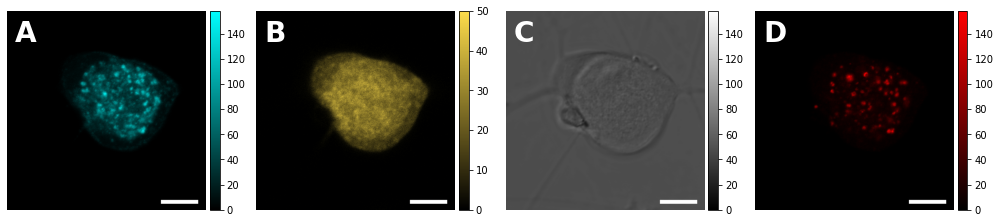

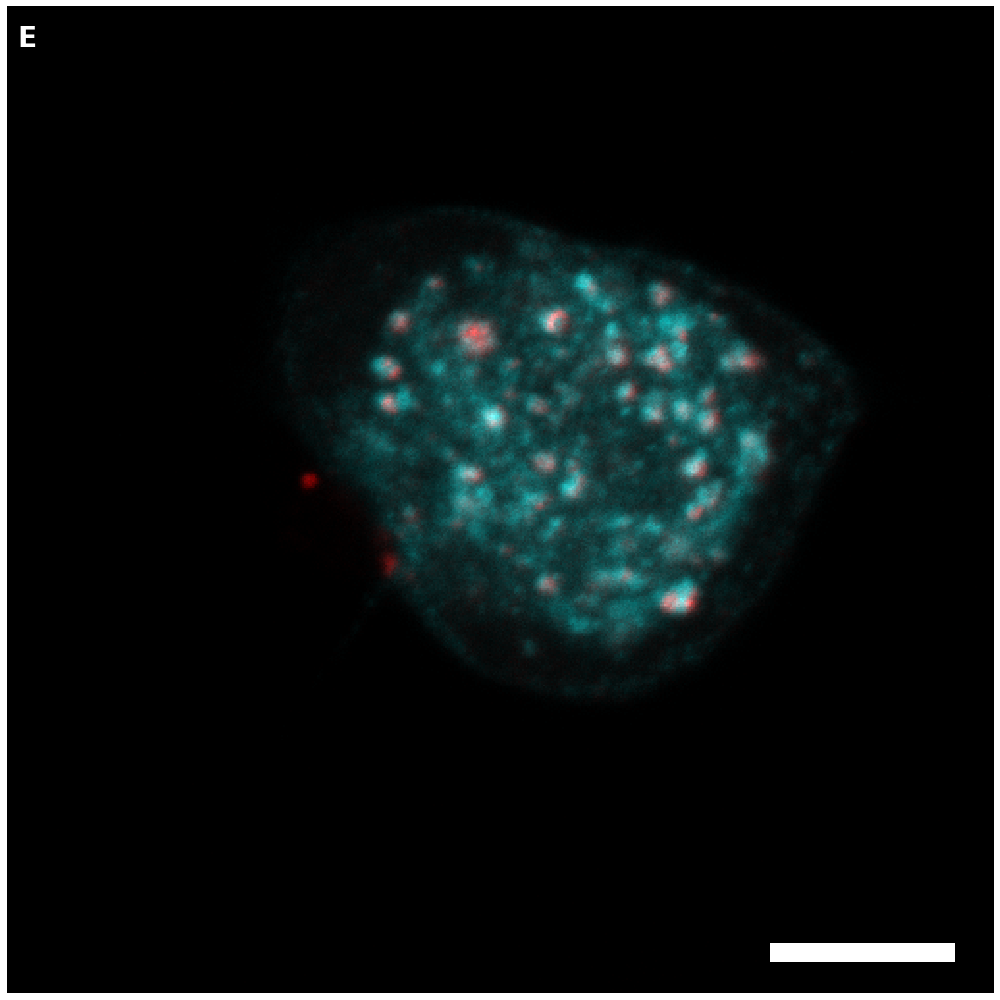

In [67]:
plt.figure(figsize=(14,14))
ax = plt.subplot(1,4,1)
plt.imshow(rgb_c, cmap=lut_c)
plt.axis('off')
plt.text(20, 80, "A", fontsize=28,color="white",weight='bold')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax)
plt.clim(0,cmax)

ax = plt.subplot(1,4,2)
plt.imshow(rgb_y, cmap=lut_y)
plt.axis('off')
plt.text(20, 80, "B", fontsize=28,color="white",weight='bold')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax)
plt.clim(0,ymax)

ax = plt.subplot(1,4,3)
plt.imshow(rgb_g, cmap=lut_g)
plt.axis('off')
plt.text(20, 80, "C", fontsize=28,color="white",weight='bold')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax)
plt.clim(0,gmax)

ax = plt.subplot(1,4,4)
plt.imshow(rgb_r, cmap=lut_r)
plt.axis('off')
plt.text(20, 80, "D", fontsize=28,color="white",weight='bold')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax)
plt.clim(0,rmax)

plt.tight_layout()

plt.figure(figsize=(14,14))
plt.imshow(merged,interpolation='none')
plt.axis('off')
plt.text(5, 20, "E", fontsize=28,color="white",weight='bold')
plt.tight_layout()


(c) Dominic Waithe 2021